# King County Real Estate Analysis

## OVERVIEW
For this project, I will focus on a real estate agency that helps homeowners buy and sell homes. The business problem I will address is the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.



## Business Problem
The business problem is to optimize the selling process for homeowners by providing them with data-driven insights and recommendations on how to increase the value of their homes, attract potential buyers, and achieve higher selling prices. The goal is to empower homeowners with the knowledge and strategies to make informed decisions about home renovations and improvements that can maximize their return on investment.

Stakeholders:

Homeowners: The primary stakeholders are homeowners who are looking to sell their properties. They want to sell their homes at the highest possible price and are seeking guidance on renovations and improvements that can enhance their home's value and market appeal.

Real Estate Agents: Real estate agents play a crucial role as intermediaries between homeowners and potential buyers. They are responsible for listing and marketing properties, negotiating deals, and advising homeowners on strategies to increase the value of their homes. Providing them with accurate and data-backed recommendations can enable them to better serve their clients and achieve successful sales.

## Data Understanding
The dataset I will use is the King County House Sales dataset, which contains information about house sales. The dataset is provided in the kc_house_data.csv file in the data folder of the project's GitHub repository.

### Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

## Data Preparation


#### Data Cleaning

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
# Importing the data
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We have missing values in "waterfront", "yr_renovated" and "view" column.

In [5]:
# Dropping columns not needed
df_new = df.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'id'], axis = 1)
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [6]:
df_new.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

Waterfront colums has missing values.

In [7]:
# Filling the NAN values in waterfront columns to No assuming there is no water in the house
df_new.fillna({'waterfront':'NO'}, inplace = True)


In [8]:
df_new.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

No missing values

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   21597 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.6+ MB


## Exploring Data

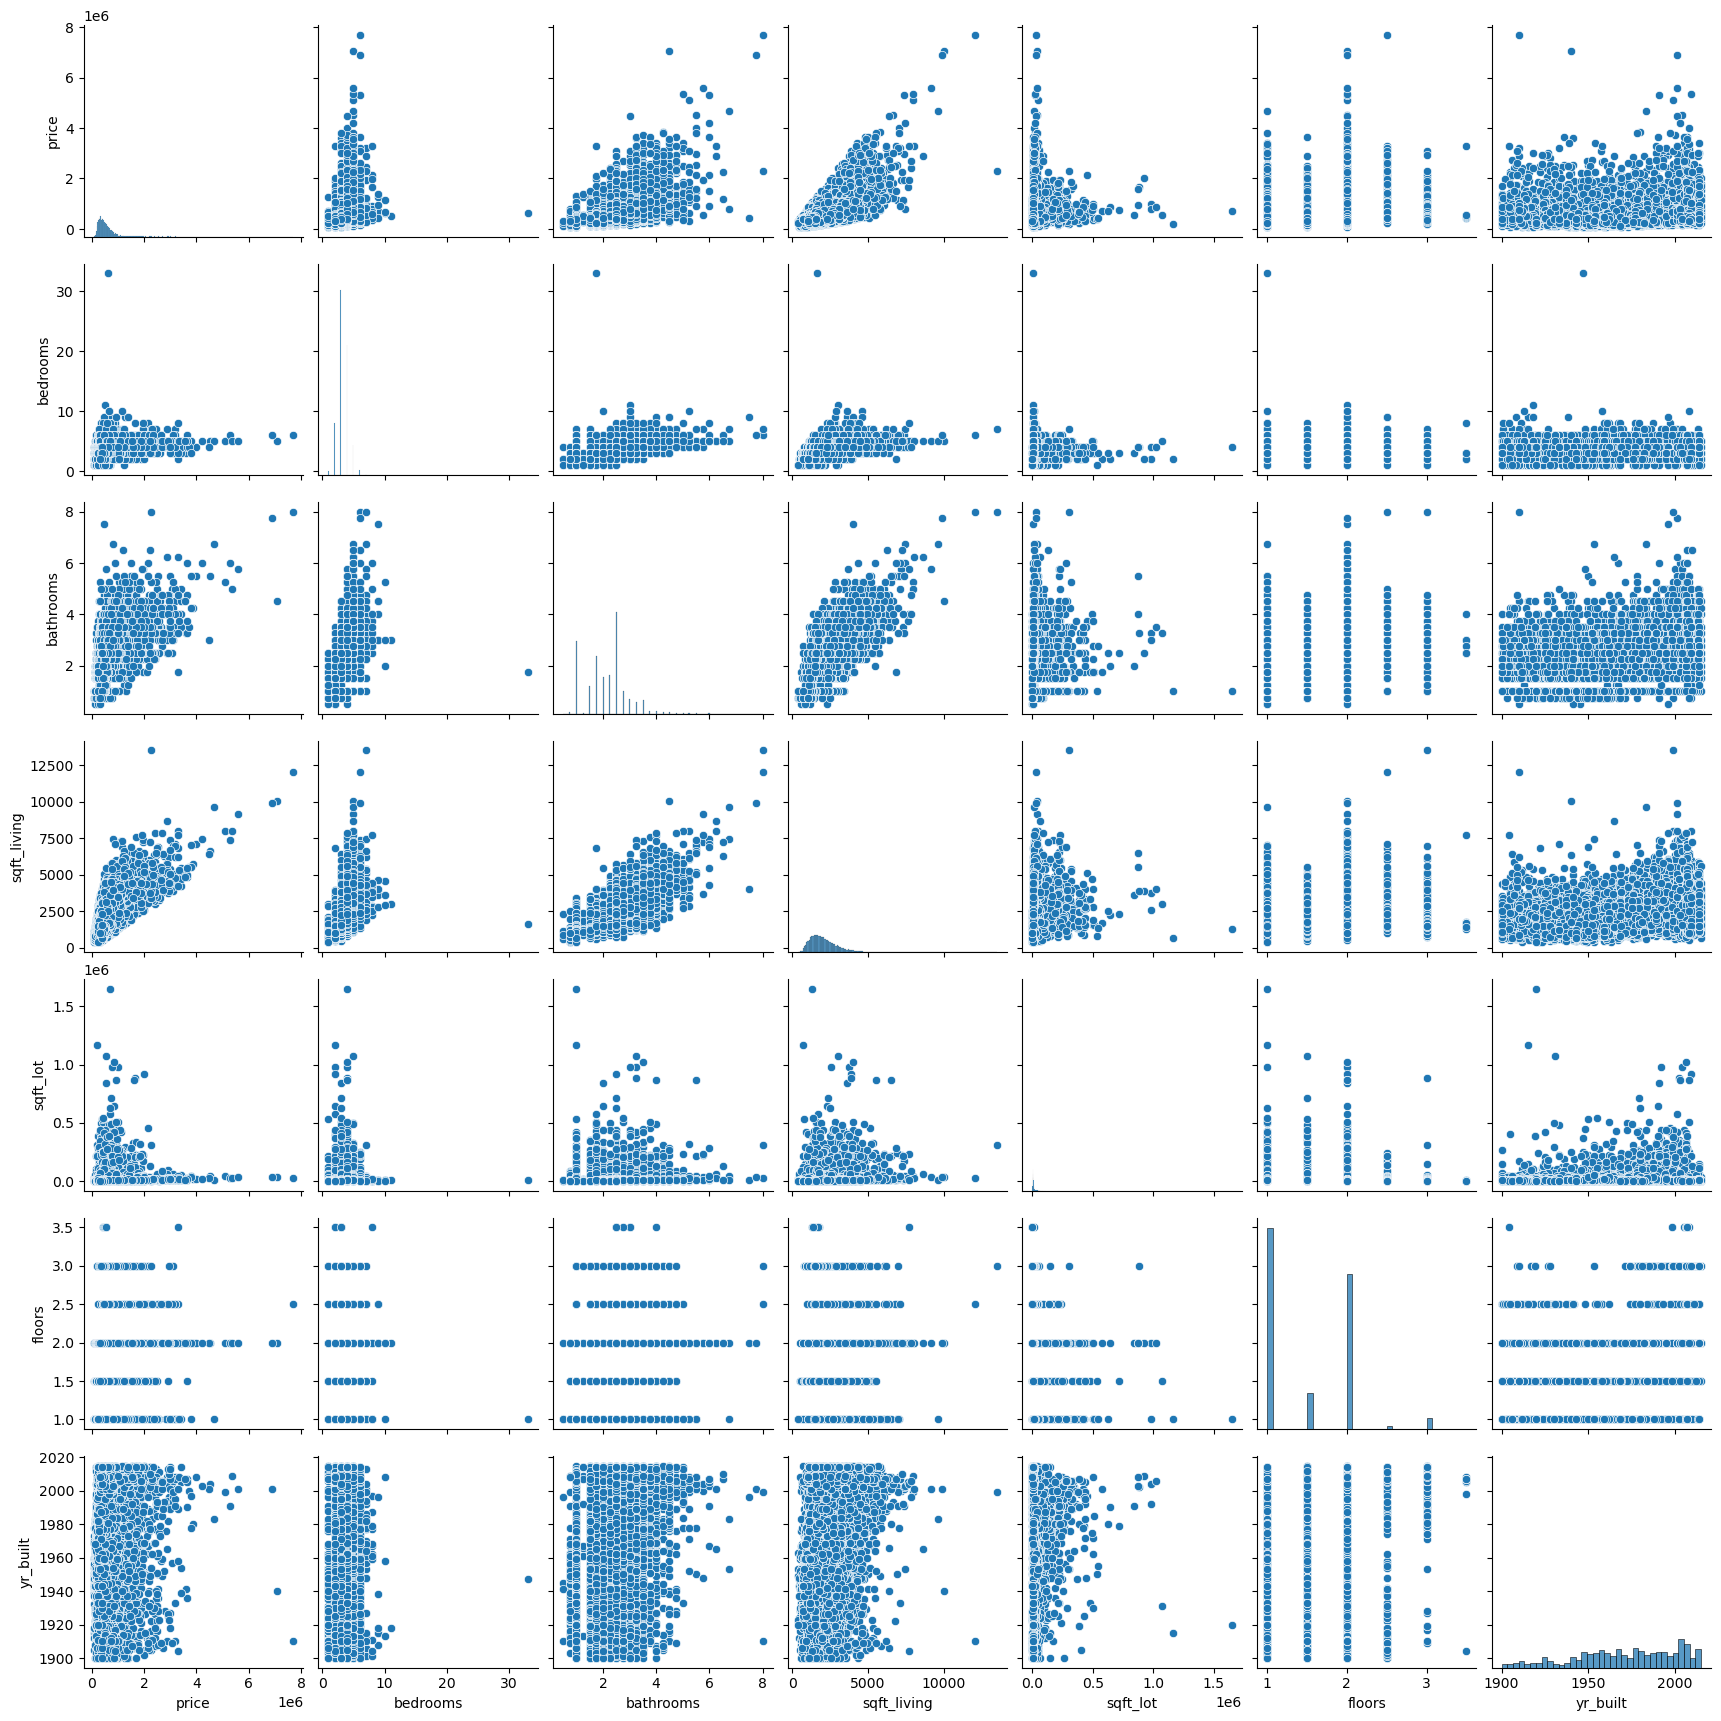

In [10]:
# visualize the predictors using pariplot
sns.pairplot(df_new)

In [11]:
# Investigate continuous and discrete Numeric predictors
df_new.select_dtypes('number')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
0,221900.0,3,1.00,1180,5650,1.0,1955
1,538000.0,3,2.25,2570,7242,2.0,1951
2,180000.0,2,1.00,770,10000,1.0,1933
3,604000.0,4,3.00,1960,5000,1.0,1965
4,510000.0,3,2.00,1680,8080,1.0,1987
...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,2009
21593,400000.0,4,2.50,2310,5813,2.0,2014
21594,402101.0,2,0.75,1020,1350,2.0,2009
21595,400000.0,3,2.50,1600,2388,2.0,2004


Observed we have outliers in the bedrooms regplot. We need to remove them inorder to have a model that has right predictions.

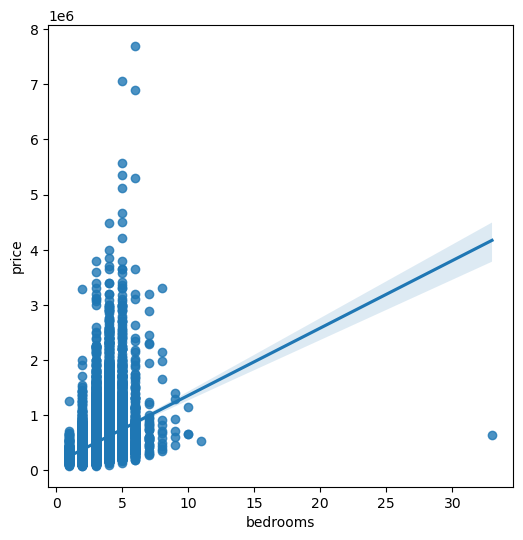

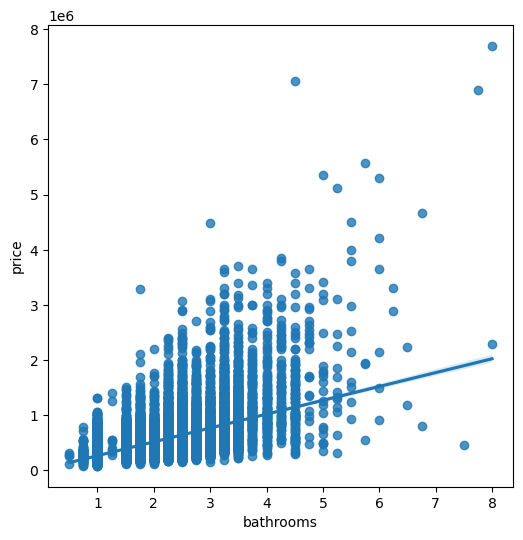

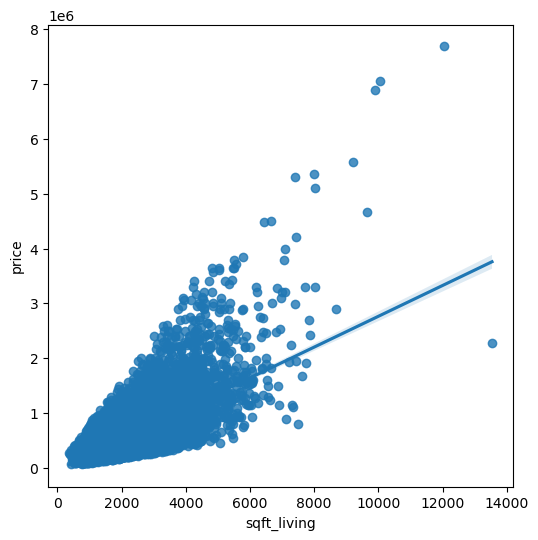

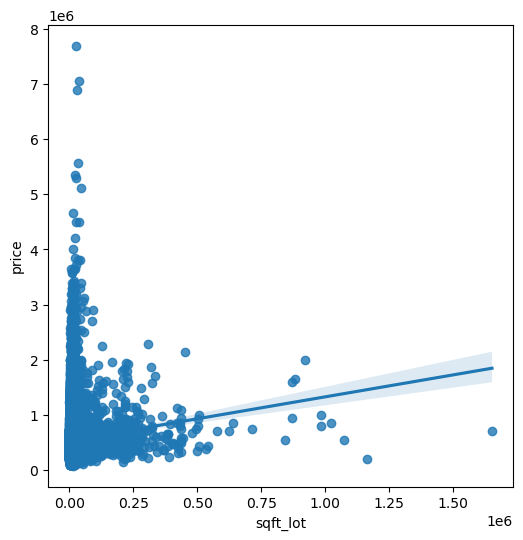

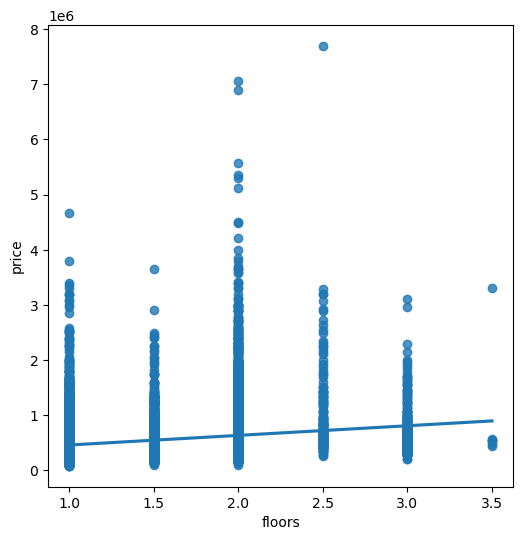

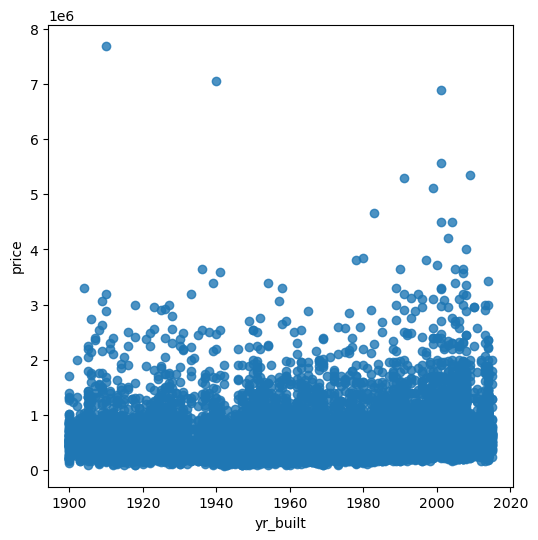

In [12]:
# Create a regplot to check for a linear relationship.
def create_regplot_loop(data, x_vars, y_var):
    for x_var in x_vars:
        plt.figure(figsize=(6, 6))  # Set the figure size
        sns.regplot(x=x_var, y=y_var, data=data)
        plt.show()  # Display the plot

# Example usage:
data = df_new
x_variables = df_new[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']]  # List of x-axis variables
y_variable = df_new['price']

create_regplot_loop(data, x_variables, y_variable)


In [13]:
# Checking for categirical predictors
df_new.select_dtypes('object')

,waterfront,condition,grade
0,NO,Average,7 Average
1,NO,Average,7 Average
2,NO,Average,6 Low Average
3,NO,Very Good,7 Average
4,NO,Average,8 Good
...,...,...,...
21592,NO,Average,8 Good
21593,NO,Average,8 Good
21594,NO,Average,7 Average
21595,NO,Average,8 Good


In [14]:
df_new['grade'].value_counts()

grade
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64

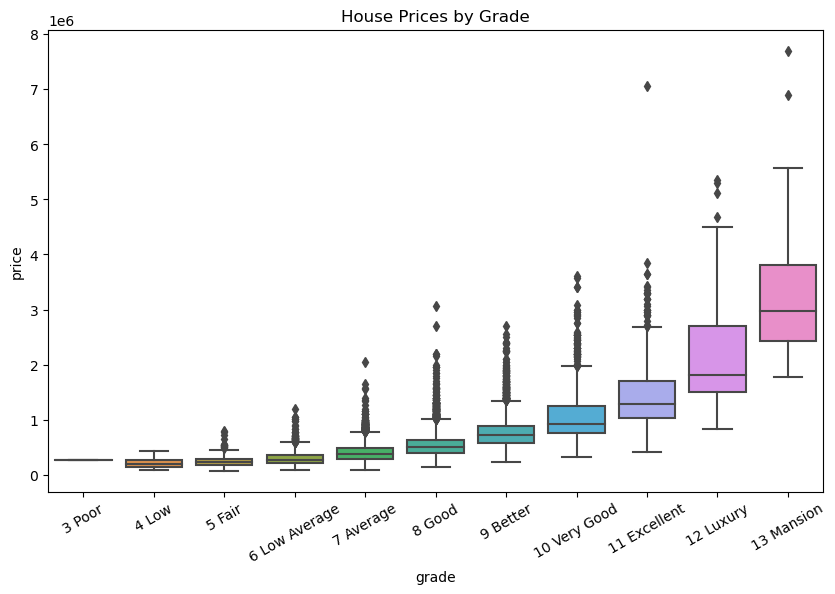

In [15]:
# Create a boxplot to show outliers
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(x = 'grade', y = 'price', data = df_new, order=['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])
ax.set_title('House Prices by Grade')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

In [16]:
df_new['condition'].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

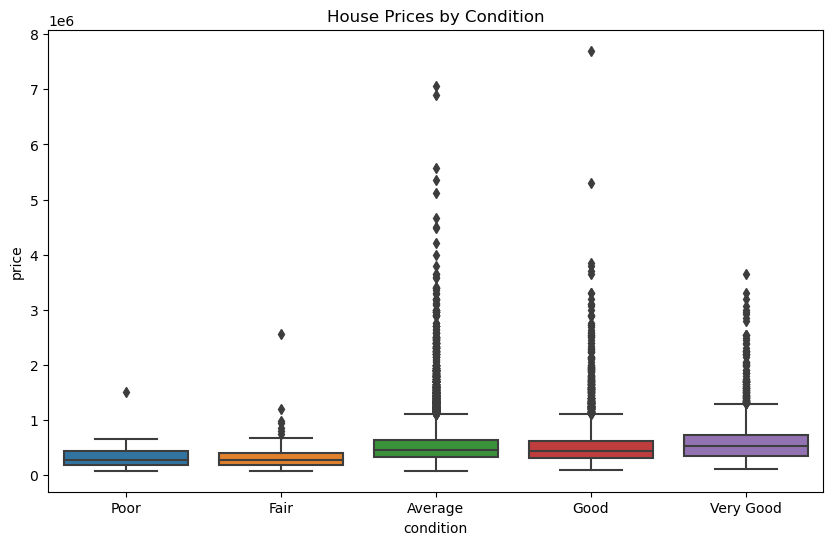

In [17]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(x = 'condition', y = 'price', data = df_new, order=['Poor', 'Fair', 'Average', 'Good', 'Very Good'])
ax.set_title('House Prices by Condition')
ax.set_xticklabels(ax.get_xticklabels());

In [18]:
df_new['waterfront'].value_counts()

waterfront
NO     21451
YES      146
Name: count, dtype: int64

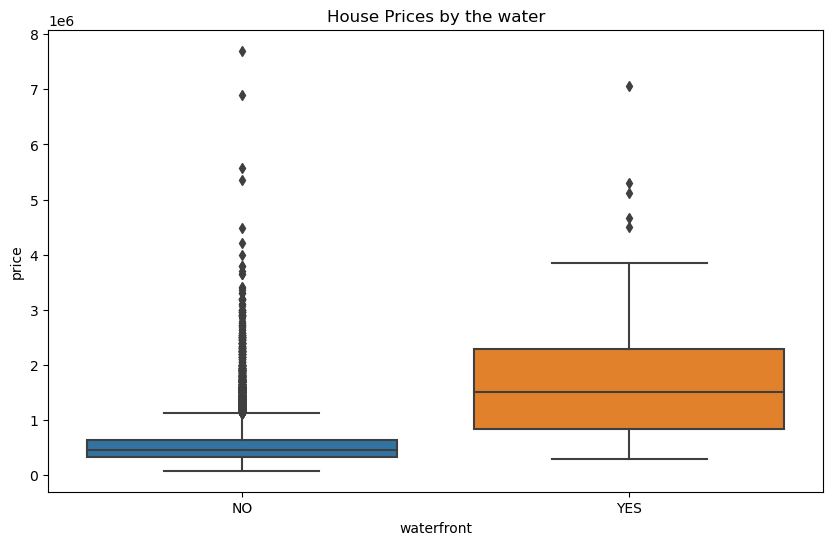

In [19]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(x = 'waterfront', y = 'price', data = df_new, order=['NO', 'YES'])
ax.set_title('House Prices by the water')
ax.set_xticklabels(ax.get_xticklabels());

#### Categorical Data

In [20]:
cat_df = df_new[['waterfront', 'condition', 'grade']]  

In [21]:
# Use encoding to make them numerals
dummies_df = pd.get_dummies(cat_df, dtype= int, drop_first= True)
dummies_df

,waterfront_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
21593,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
21594,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21595,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [22]:
dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   waterfront_YES       21597 non-null  int64
 1   condition_Fair       21597 non-null  int64
 2   condition_Good       21597 non-null  int64
 3   condition_Poor       21597 non-null  int64
 4   condition_Very Good  21597 non-null  int64
 5   grade_11 Excellent   21597 non-null  int64
 6   grade_12 Luxury      21597 non-null  int64
 7   grade_13 Mansion     21597 non-null  int64
 8   grade_3 Poor         21597 non-null  int64
 9   grade_4 Low          21597 non-null  int64
 10  grade_5 Fair         21597 non-null  int64
 11  grade_6 Low Average  21597 non-null  int64
 12  grade_7 Average      21597 non-null  int64
 13  grade_8 Good         21597 non-null  int64
 14  grade_9 Better       21597 non-null  int64
dtypes: int64(15)
memory usage: 2.5 MB


In [23]:
cont_df = df_new[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'price']]

In [24]:
# Join the category df and dummy df
data = cont_df.join(dummies_df)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,price,waterfront_YES,condition_Fair,condition_Good,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,3,1.00,1180,5650,1.0,1955,221900.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570,7242,2.0,1951,538000.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,1.00,770,10000,1.0,1933,180000.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,3.00,1960,5000,1.0,1965,604000.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3,2.00,1680,8080,1.0,1987,510000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
# converting the dtypes to int
data['bathrooms'] = data['bathrooms'].apply(int)
data['floors'] = data['floors'].apply(int)
data['price'] = data['price'].apply(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   bedrooms             21597 non-null  int64
 1   bathrooms            21597 non-null  int64
 2   sqft_living          21597 non-null  int64
 3   sqft_lot             21597 non-null  int64
 4   floors               21597 non-null  int64
 5   yr_built             21597 non-null  int64
 6   price                21597 non-null  int64
 7   waterfront_YES       21597 non-null  int64
 8   condition_Fair       21597 non-null  int64
 9   condition_Good       21597 non-null  int64
 10  condition_Poor       21597 non-null  int64
 11  condition_Very Good  21597 non-null  int64
 12  grade_11 Excellent   21597 non-null  int64
 13  grade_12 Luxury      21597 non-null  int64
 14  grade_13 Mansion     21597 non-null  int64
 15  grade_3 Poor         21597 non-null  int64
 16  grade_4 Low          2

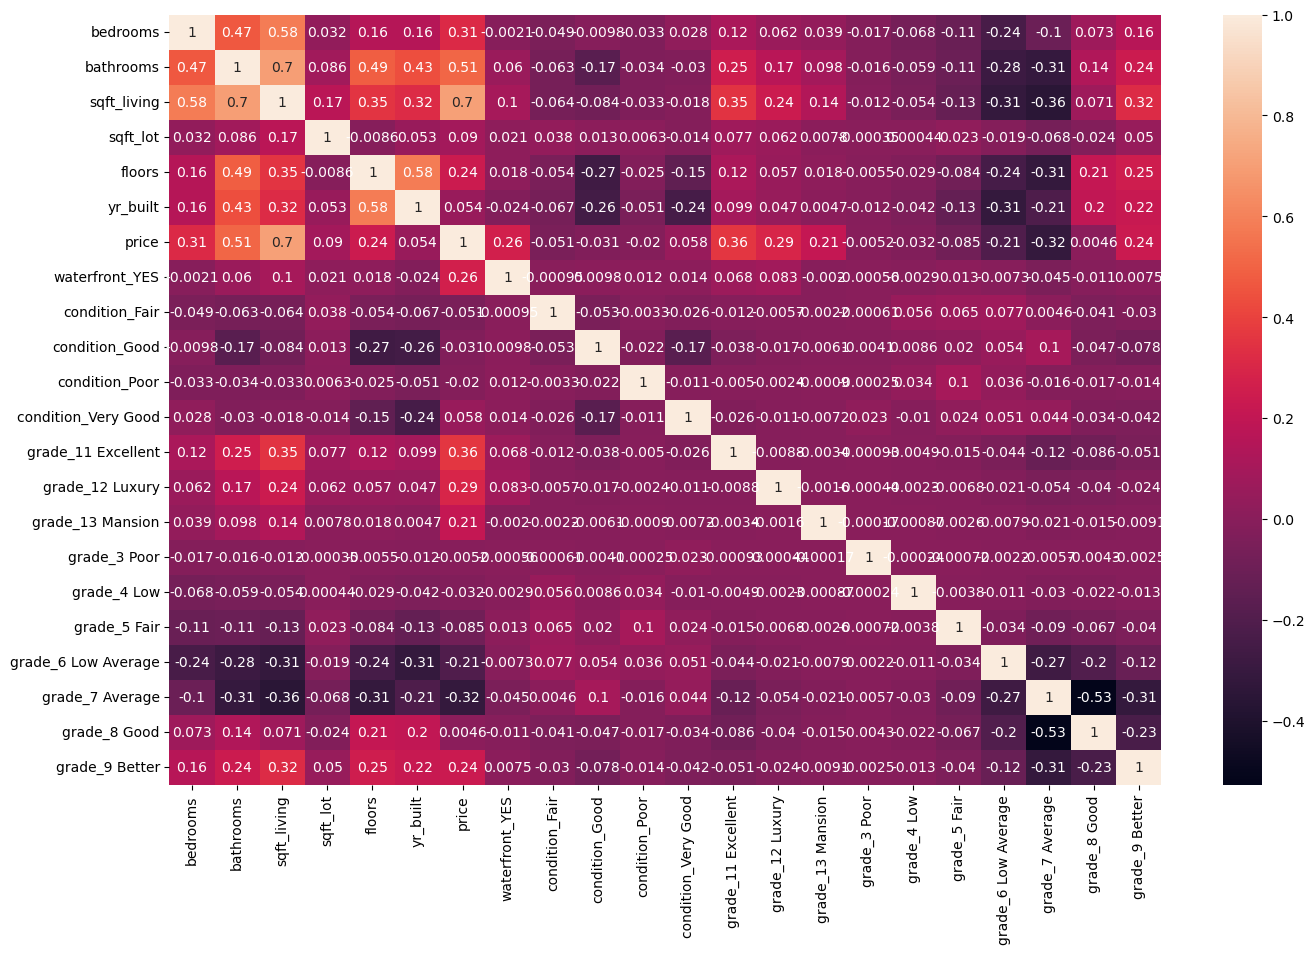

In [26]:
# creating a heatmap to show us correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(data.corr(), annot=True);

In [27]:
data.corr()['price']

bedrooms               0.308787
bathrooms              0.510631
sqft_living            0.701917
sqft_lot               0.089876
floors                 0.237264
yr_built               0.053953
price                  1.000000
waterfront_YES         0.264306
condition_Fair        -0.051432
condition_Good        -0.030759
condition_Poor        -0.019886
condition_Very Good    0.057531
grade_11 Excellent     0.357589
grade_12 Luxury        0.291068
grade_13 Mansion       0.211806
grade_3 Poor          -0.005155
grade_4 Low           -0.031618
grade_5 Fair          -0.084549
grade_6 Low Average   -0.209463
grade_7 Average       -0.316053
grade_8 Good           0.004576
grade_9 Better         0.235859
Name: price, dtype: float64

We can see that sqft_living is highly correlated with price at (0.701917)

## Data Modeling

### Baseline Model


In [28]:
# Assigning X and y variables
X = data[['sqft_living']]
y = data[['price']]



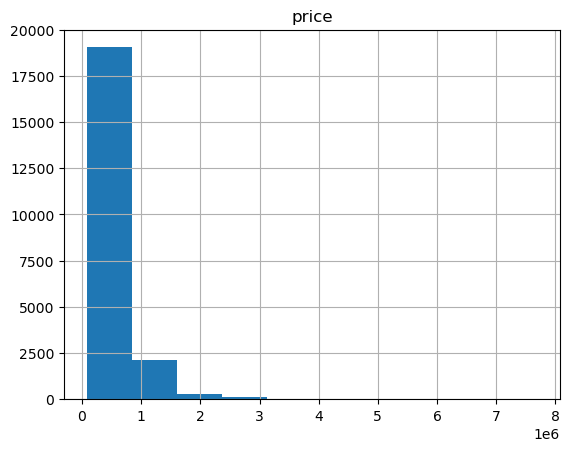

In [29]:
# Checking the if y is normally distributed.
y.hist();

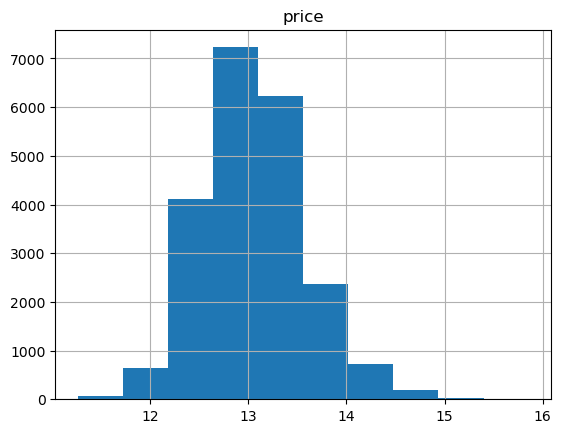

In [30]:
# Transforming y using log
y_log = np.log(y)
y_log.hist();

In [31]:

# Add a constant column to the feature matrix
X = sm.add_constant(X)


# Fit the model and obtain the predicted values
model = sm.OLS(y_log, X)  
results = model.fit()



# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.020e+04
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:26:57   Log-Likelihood:                -9662.2
No. Observations:               21597   AIC:                         1.933e+04
Df Residuals:                   21595   BIC:                         1.934e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2188      0.006   1915.383      

Checking the RMSE of the baseline model

In [32]:

X_const = sm.add_constant(X)
# Fit the model and obtain the predicted values
model = sm.OLS(y_log, X_const)  
results = model.fit()
predicted_values = results.predict(X_const)

# Calculate the residuals
residuals = y_log - predicted_values

# Calculate the RMSE
rmse = np.sqrt(np.mean(residuals**2))


#### Observation

The R-squared value is 0.483, which means that approximately 48.3% of the variation in the mean price can be explained by the variables in the model.

The coefficient for the constant term (intercept) is 12.2187, which represents the estimated mean price when all other variables are held constant.

The coefficient for the sqft_living variable is 0.0004. This indicates that, on average, a one-unit increase in the square root of living area is associated with a 0.0004 unit increase in the mean price.

The RMSE is 0.3145 



#### Homescedasticity check

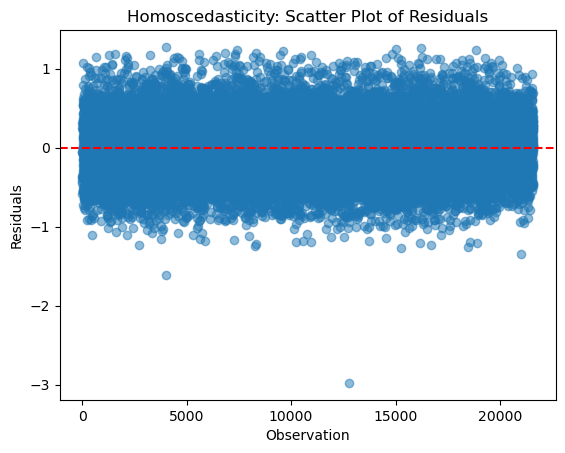

In [33]:
# Calculate the residuals
residuals = results.resid

# Create the scatter plot of residuals
plt.scatter(x=range(residuals.shape[0]), y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Homoscedasticity: Scatter Plot of Residuals');

The plot shows that the assumption of homoscedasticity holds.

##### Normality check

Text(0.5, 1.0, 'Q-Q Plot of Residuals')

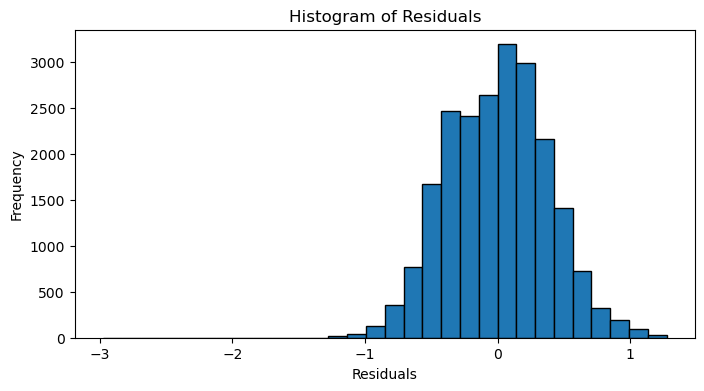

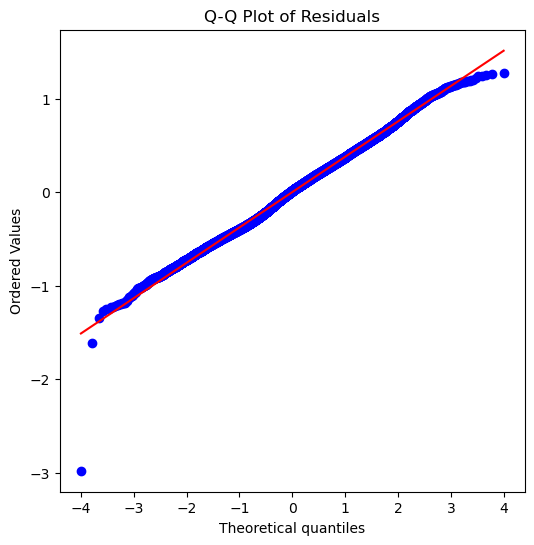

In [34]:
# Plot the histogram of residuals
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals');

# Plot the Q-Q plot of residuals
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')


The histogram of residuals is relatively normal.
The Q-Q plot also shows the plot is relatively normal with exception of a few outliers.

#### Second model

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Split your data into features (X) and target variable (y)
X = data.drop(['price'], axis = 1)
y = data['price']
y_log = np.log(y)

# Create a base estimator for RFE (e.g., Linear Regression)
base_estimator = LinearRegression()

# Create an RFE object
rfe = RFE(estimator=base_estimator, n_features_to_select=10)  # Adjust the number of features to select

# Fit the RFE object to your data
rfe.fit(X, y_log)

# Get the selected features
selected_features = X.columns[rfe.support_]
selected_features



Index(['waterfront_YES', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good'],
      dtype='object')

To solve multicolinerity we used Recursive Feature Elimination (RFE):
RFE recursively removes features from the dataset based on their importance in predicting the target variable. It fits the model multiple times, each time removing the least important feature until a desired number of features remains.

In [36]:
# Create a variable X_1 for the X axis

X_1 = X[selected_features]

# Fit the model and obtain the predicted values
model1 = sm.OLS(y_log, sm.add_constant(X_1))
results = model1.fit()


# Print the model summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     2136.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:26:59   Log-Likelihood:                -9362.7
No. Observations:               21597   AIC:                         1.875e+04
Df Residuals:                   21586   BIC:                         1.884e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.5729    

In [37]:
X_const = sm.add_constant(X_1)
# Fit the model and obtain the predicted values
model1 = sm.OLS(y_log, X_const)  
results = model1.fit()
predicted_values = results.predict(X_const)

# Calculate the residuals
residuals = y_log - predicted_values

# Calculate the RMSE
rmse = np.sqrt(np.mean(residuals**2))


This is a higher RMSE despite it having a higher R-squared compared to my first model.(0.37)

#### Homoscedasticity check

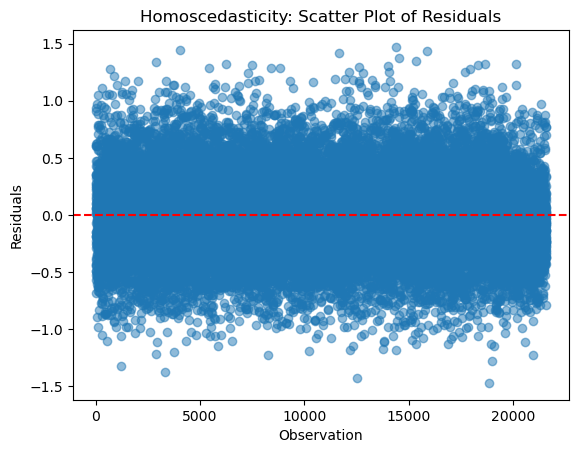

In [38]:
residuals = results.resid

# Create the scatter plot of residuals
plt.scatter(x=range(residuals.shape[0]), y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Homoscedasticity: Scatter Plot of Residuals');

The plot shows that the assumption of homoscedasticity holds.

#### Normality check

Text(0.5, 1.0, 'Q-Q Plot of Residuals')

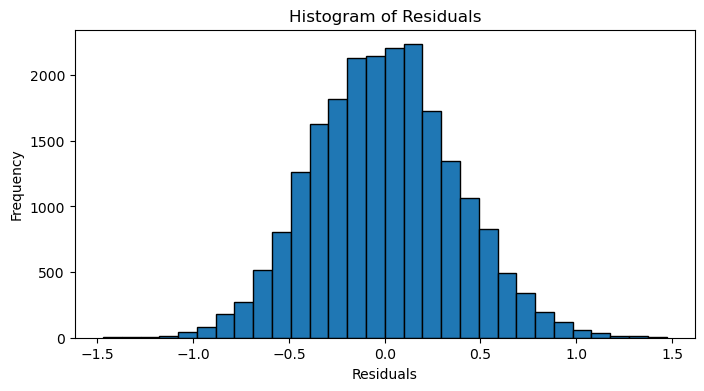

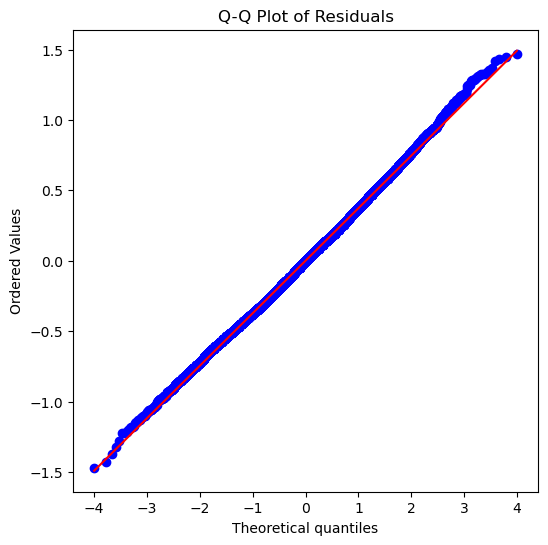

In [39]:
# Plot the histogram of residuals
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals');

# Plot the Q-Q plot of residuals
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')


The histogram of residuals is relatively normal.
The Q-Q plot also shows the plot is relatively normal with exception of a few outliers.

#### Observations
R-squared and Adjusted R-squared: The R-squared value is 0.497, indicating that approximately 49.7% of the variance in the target variable (price) is explained by the model. 
F-statistic and Prob (F-statistic): The F-statistic is 2137, indicating the overall statistical significance of the model. 

The coefficients represent the estimated effect of each feature on the target variable (price). Example, the coefficient for waterfront_YES suggests that, having a waterfront property is associated with an increase in price of approximately 0.7461 units.

The P-value represents the statistical significance of each coefficient. A P-value less than 0.05 significance level indicates that the coefficient is statistically significant.

Based on the provided information, it seems that the presence of a waterfront, specific grade levels, and property types have a significant impact on the price prediction.

However, further analysis and interpretation should consider the specific context, assumptions, and limitations of the model.


#### Third model

In [40]:
# creating a model using (y)
# using X_1 because it solved multicolinerity
model2 = sm.OLS(y, sm.add_constant(X_1)).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     2479.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:27:01   Log-Likelihood:            -2.9913e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21586   BIC:                         5.984e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.522e+05   4

Obtaining the RMSE of Model

In [41]:

X_const = sm.add_constant(X_1)
# Fit the model and obtain the predicted values
model2 = sm.OLS(y, X_const)  # Drop the 'const' column from X
results2 = model2.fit()
predicted_values = results2.predict(X_const)


# Calculate the residuals
residuals = y - predicted_values

# Calculate the RMSE
rmse2 = np.sqrt(np.mean(residuals**2))




Model2 has a much higher rmse compared to the first model and the second model(250620.48) thus less acurate results.

#### Homescadastisity of model2

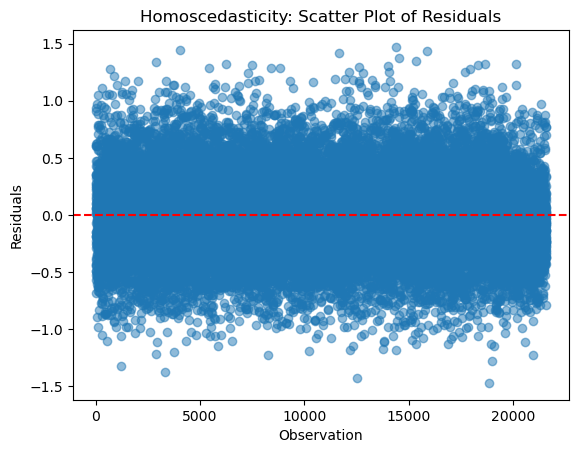

In [42]:
# Create the scatter plot of residuals
plt.scatter(x=range(residuals.shape[0]), y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Homoscedasticity: Scatter Plot of Residuals');

The plot shows that the assumption of homoscedasticity holds.

#### Normality of Model2

Text(0.5, 1.0, 'Q-Q Plot of Residuals')

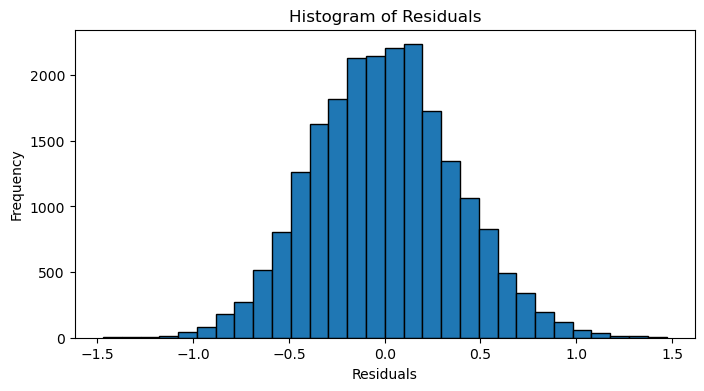

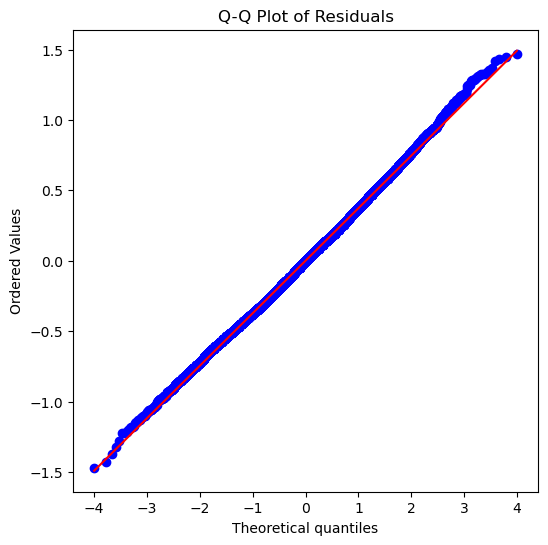

In [43]:
# Plot the histogram of residuals
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals');

# Plot the Q-Q plot of residuals
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

We can see Model2 is normally distributed. The Q-Q plot shows its is normally distributed with a few outliers.

#### Observations
R-squared and Adjusted R-squared: The R-squared value is 0.535, indicating that approximately 53.5% of the variance in the target variable (price) is explained by the model. 
F-statistic and Prob (F-statistic): The F-statistic is 2479, indicating the overall statistical significance of the model. 

The coefficients represent the estimated effect of each feature on the target variable (price). Example, the coefficient for waterfront_YES suggests that, having a waterfront property is associated with an increase in price of approximately 889,600 units.

The P-value represents the statistical significance of each coefficient. A P-value less than 0.05 significance level indicates that the coefficient is statistically significant. Waterfront, Grade 11 excellent, Grade 12 luxury and Grade 13 mansion are statistically significant.

However, further analysis and interpretation should consider the specific context, assumptions, and limitations of the model.

## Visualizing My conclusions

In [44]:
dummies_df1 = pd.get_dummies(cat_df, dtype= int)

data1 = cont_df.join(dummies_df1)
data1.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,price,waterfront_NO,waterfront_YES,condition_Average,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,3,1.00,1180,5650,1.0,1955,221900.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570,7242,2.0,1951,538000.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,1.00,770,10000,1.0,1933,180000.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4,3.00,1960,5000,1.0,1965,604000.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3,2.00,1680,8080,1.0,1987,510000.0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [45]:
# Calculate the mean price for waterfront and non-waterfront properties
mean_waterfront_price = data1[data1['waterfront_YES'] == 1]['price'].mean()
mean_non_waterfront_price = data1[data1['waterfront_YES'] == 0]['price'].mean()

# Display the mean prices
print("Mean Price - Waterfront:", mean_waterfront_price)
print("Mean Price - Non-Waterfront:", mean_non_waterfront_price)


Mean Price - Waterfront: 1717214.7260273972
Mean Price - Non-Waterfront: 532286.2219943126


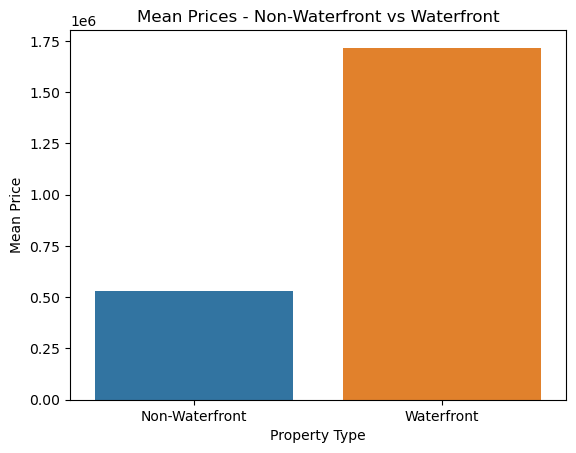

In [46]:
# Creating barplot of waterfront category
mean_prices = [ 532281.7729497879, 1717214.7260273972]
labels = ['Non-Waterfront', 'Waterfront']

sns.barplot(x=labels, y=mean_prices)
plt.title('Mean Prices - Non-Waterfront vs Waterfront')
plt.xlabel('Property Type')
plt.ylabel('Mean Price')

plt.show()


In [47]:
# Calculate the mean price for grade properties
mean_Poor_price = data1[data1['grade_3 Poor'] == 1]['price'].mean()
mean_Low_price = data1[data1['grade_4 Low'] == 1]['price'].mean()
mean_Fair_price = data1[data1['grade_5 Fair'] == 1]['price'].mean()
mean_Low_Average_price = data1[data1['grade_6 Low Average'] == 1]['price'].mean()
mean_Average_price = data1[data1['grade_7 Average'] == 1]['price'].mean()
mean_Good_price = data1[data1['grade_8 Good'] == 1]['price'].mean()
mean_Better_price = data1[data1['grade_9 Better'] == 1]['price'].mean()
mean_Very_Good_price = data1[data1['grade_10 Very Good'] == 1]['price'].mean()
mean_Excellent_price = data1[data1['grade_11 Excellent'] == 1]['price'].mean()
mean_Luxury_price = data1[data1['grade_12 Luxury'] == 1]['price'].mean()
mean_Mansion_price = data1[data1['grade_13 Mansion'] == 1]['price'].mean()

# Display the mean prices
print("Mean Grade 3 Price - :", mean_Poor_price)
print("Mean Grade 4 Price - :", mean_Low_price)
print("Mean Grade 5 Price - :", mean_Fair_price)
print("Mean Grade 6 Price - :", mean_Low_Average_price)
print("Mean Grade 7 Price - :", mean_Average_price)
print("Mean Grade 8 Price - :", mean_Good_price)
print("Mean Grade 9 Price - :", mean_Better_price)
print("Mean Grade 10 Price - :", mean_Very_Good_price)
print("Mean Grade 11 Price - :", mean_Excellent_price)
print("Mean Grade 12 Price - :", mean_Luxury_price)
print("Mean Grade 13 Price - :", mean_Mansion_price)






Mean Grade 3 Price - : 262000.0
Mean Grade 4 Price - : 212001.85185185185
Mean Grade 5 Price - : 248523.97107438016
Mean Grade 6 Price - : 301916.57065750734
Mean Grade 7 Price - : 402594.57276576775
Mean Grade 8 Price - : 542986.8
Mean Grade 9 Price - : 773738.2221797323
Mean Grade 10 Price - : 1072347.467372134
Mean Grade 11 Price - : 1497792.3784461152
Mean Grade 12 Price - : 2202528.0898876404
Mean Grade 13 Price - : 3710769.230769231


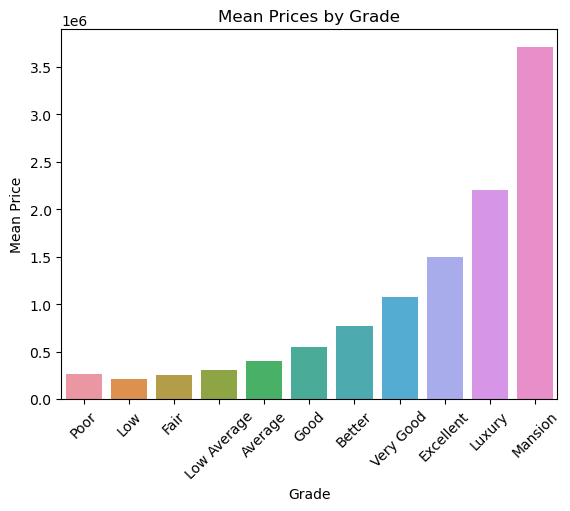

In [48]:
# Creating barplot for Grade category with mean price
grades = ['Poor', 'Low', 'Fair', 'Low Average', 'Average', 'Good', 'Better', 'Very Good', 'Excellent', 'Luxury', 'Mansion']
mean_prices = [mean_Poor_price, mean_Low_price, mean_Fair_price, mean_Low_Average_price, mean_Average_price,
               mean_Good_price, mean_Better_price, mean_Very_Good_price, mean_Excellent_price, mean_Luxury_price, mean_Mansion_price]

sns.barplot(x=grades, y=mean_prices)
plt.title('Mean Prices by Grade')
plt.xlabel('Grade')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


In [51]:
data1.corr()['price']

bedrooms               0.308787
bathrooms              0.525906
sqft_living            0.701917
sqft_lot               0.089876
floors                 0.256804
yr_built               0.053953
price                  1.000000
waterfront_NO         -0.264306
waterfront_YES         0.264306
condition_Average      0.006948
condition_Fair        -0.051432
condition_Good        -0.030759
condition_Poor        -0.019886
condition_Very Good    0.057531
grade_10 Very Good     0.340944
grade_11 Excellent     0.357589
grade_12 Luxury        0.291068
grade_13 Mansion       0.211806
grade_3 Poor          -0.005155
grade_4 Low           -0.031618
grade_5 Fair          -0.084549
grade_6 Low Average   -0.209463
grade_7 Average       -0.316053
grade_8 Good           0.004576
grade_9 Better         0.235859
Name: price, dtype: float64

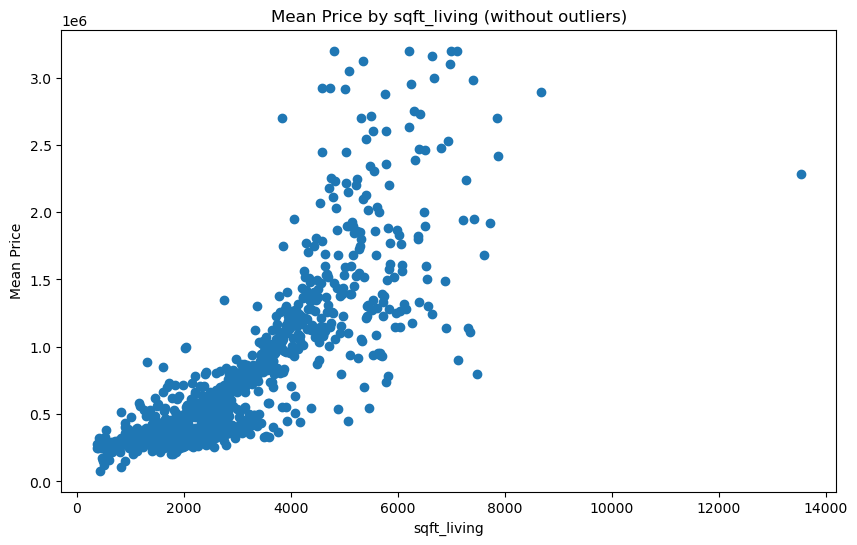

In [52]:
# Calculate the mean price for each sqft_living value
mean_prices = data1.groupby('sqft_living')['price'].mean().reset_index()

# Remove outliers based on a certain criterion (e.g., z-score)
z_scores = np.abs((mean_prices['price'] - mean_prices['price'].mean()) / mean_prices['price'].std())
threshold = 3  # Adjust the threshold as needed
mean_prices = mean_prices[z_scores < threshold]

# Plot the remaining data points
plt.figure(figsize=(10, 6))
plt.scatter(mean_prices['sqft_living'], mean_prices['price'])
plt.xlabel('sqft_living')
plt.ylabel('Mean Price')
plt.title('Mean Price by sqft_living (without outliers)')
plt.show()



Sqft_living has the highest correlation to price but this does not mean its significantly related. Due to the fact that grade plays a major role in the price and waterfront. A large house that has a poor or low grade will be cheap

### Results 

Using our second model with the following results,
Our model is statistically significant overall, with an F-statistic 2137.
The model is 49.7% of the variance in the target variable(price).
Grade 13 Mansion has the highest coefficient to price(1.455)

The higher the grading of a property, the higher the price. Instance Grade 13 Mansion will attract 3,710,769 Average Price.
While a property on water will attract 17,172,145 Average Price.


## Conclusion

To increase Value of Property so as to sell at the highest price possible, the Real estate Company should advise their homeowners the following 

Grade is the Most important factor to consider.

Followed by Waterfront.

## Recommendation

Use higher quality materials (interior and exterior) to increase value of property. Eg Flooring, roofing. And the property should be well constructed to avoid grade being affected negatively.
Having Property near water also significantly increases Price.